In [ ]:
!pip install spacy
!pip install scattertext

     |████████████████████████████████| 7.3 MB 3.3 MB/s 
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=0d3a6f217630fdfcd0c437a4fe928aaa2b8be937ec05990272a3f35517ae0639
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!pip install https://gitlab.com/trungtv/vi_spacy/-/raw/master/vi_core_news_lg/dist/vi_core_news_lg-0.0.1.tar.gz
!pip install pyvi

     |████████████████████████████████| 254.5 MB 31 kB/s 
     |████████████████████████████████| 5.8 MB 3.5 MB/s 
     |████████████████████████████████| 10.1 MB 35.8 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 451 kB 67.7 MB/s 
     |████████████████████████████████| 653 kB 64.3 MB/s 
  Created wheel for vi-core-news-lg: filename=vi_core_news_lg-0.0.1-py3-none-any.whl size=254513618 sha256=987fd7e9ed974a91370906f500281c375002b43d655004745c540fd6d00fb83a
  Stored in directory: /root/.cache/pip/wheels/e4/d9/90/dcbb25186a2c3335b17bc675f8dddcb43ecdfa4b400e8c91b0
Successfully built vi-core-news-lg
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thin

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd '/gdrive/MyDrive/LDS0_K273_ONLINE_DoThiPhuong/Presentation/Project3/'

/gdrive/MyDrive/LDS0_K273_ONLINE_DoThiPhuong/Presentation/Project3


In [ ]:
import pandas as pd
import spacy
import scattertext as st
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data = pd.read_csv('processed_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22640 entries, 0 to 22639
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   restaurant      22640 non-null  object 
 1   review_text     22640 non-null  object 
 2   review_score    22640 non-null  float64
 3   target          22640 non-null  int64  
 4   english         22640 non-null  int64  
 5   review_text_wt  22640 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


In [ ]:
len(data.restaurant.unique())

567

Dữ liệu gồm 22640 đánh giá cho 56 nhà hàng.

In [ ]:
data.head()

,restaurant,review_text,review_score,target,english,review_text_wt
0,Chả Cá Hà Nội Xưa,nhà hàng mới đổi địa chỉ sang hồng hà khá gần ...,8.8,1,0,nhà_hàng mới đổi địa_chỉ sang hồng hà khá gần ...
1,Chả Cá Hà Nội Xưa,quán đã chuyển về hồng hà cới phong cách khác ...,3.2,0,0,quán đã chuyển về hồng hà cới phong_cách khác ...
2,Chả Cá Hà Nội Xưa,giá niêm yết trên ứng dụng một kiểu giá lúc sh...,3.2,0,0,giá niêm_yết trên ứng_dụng một kiểu giá lúc sh...
3,Chả Cá Hà Nội Xưa,xem nhận xét thấy mọi người khen chả cá lã vọn...,7.0,1,0,xem nhận_xét thấy mọi người khen chả_cá lã vọn...
4,Chả Cá Hà Nội Xưa,tối nay mới đi ăn quán này món chả cá lã vọng ...,9.2,1,0,tối nay mới đi ăn quán này món chả_cá lã vọng ...


In [ ]:
data['label'] = data.review_score.apply(lambda x: 'dislike' if x < 6.5 else 'like')

In [ ]:
data.head()

,restaurant,review_text,review_score,target,english,review_text_wt,label
0,Chả Cá Hà Nội Xưa,nhà hàng mới đổi địa chỉ sang hồng hà khá gần ...,8.8,1,0,nhà_hàng mới đổi địa_chỉ sang hồng hà khá gần ...,like
1,Chả Cá Hà Nội Xưa,quán đã chuyển về hồng hà cới phong cách khác ...,3.2,0,0,quán đã chuyển về hồng hà cới phong_cách khác ...,dislike
2,Chả Cá Hà Nội Xưa,giá niêm yết trên ứng dụng một kiểu giá lúc sh...,3.2,0,0,giá niêm_yết trên ứng_dụng một kiểu giá lúc sh...,dislike
3,Chả Cá Hà Nội Xưa,xem nhận xét thấy mọi người khen chả cá lã vọn...,7.0,1,0,xem nhận_xét thấy mọi người khen chả_cá lã vọn...,like
4,Chả Cá Hà Nội Xưa,tối nay mới đi ăn quán này món chả cá lã vọng ...,9.2,1,0,tối nay mới đi ăn quán này món chả_cá lã vọng ...,like


In [ ]:
nlp = spacy.load('vi_core_news_lg')

In [ ]:
corpus = st.CorpusFromPandas(data, category_col = 'label',
                             text_col = 'review_text_wt',
                             nlp = nlp).build()

In [ ]:
sent = st.produce_scattertext_explorer(corpus,
                                       category = 'dislike',
                                       category_name = 'Dislike',
                                       not_categories = ['like'],
                                       not_category_name = 'Like',
                                       width_in_pixels = 1000,
                                       metadata = data['review_text'])

In [ ]:
open('Foody_Sentiment.html', 'wb').write(sent.encode('utf-8'))

36917486

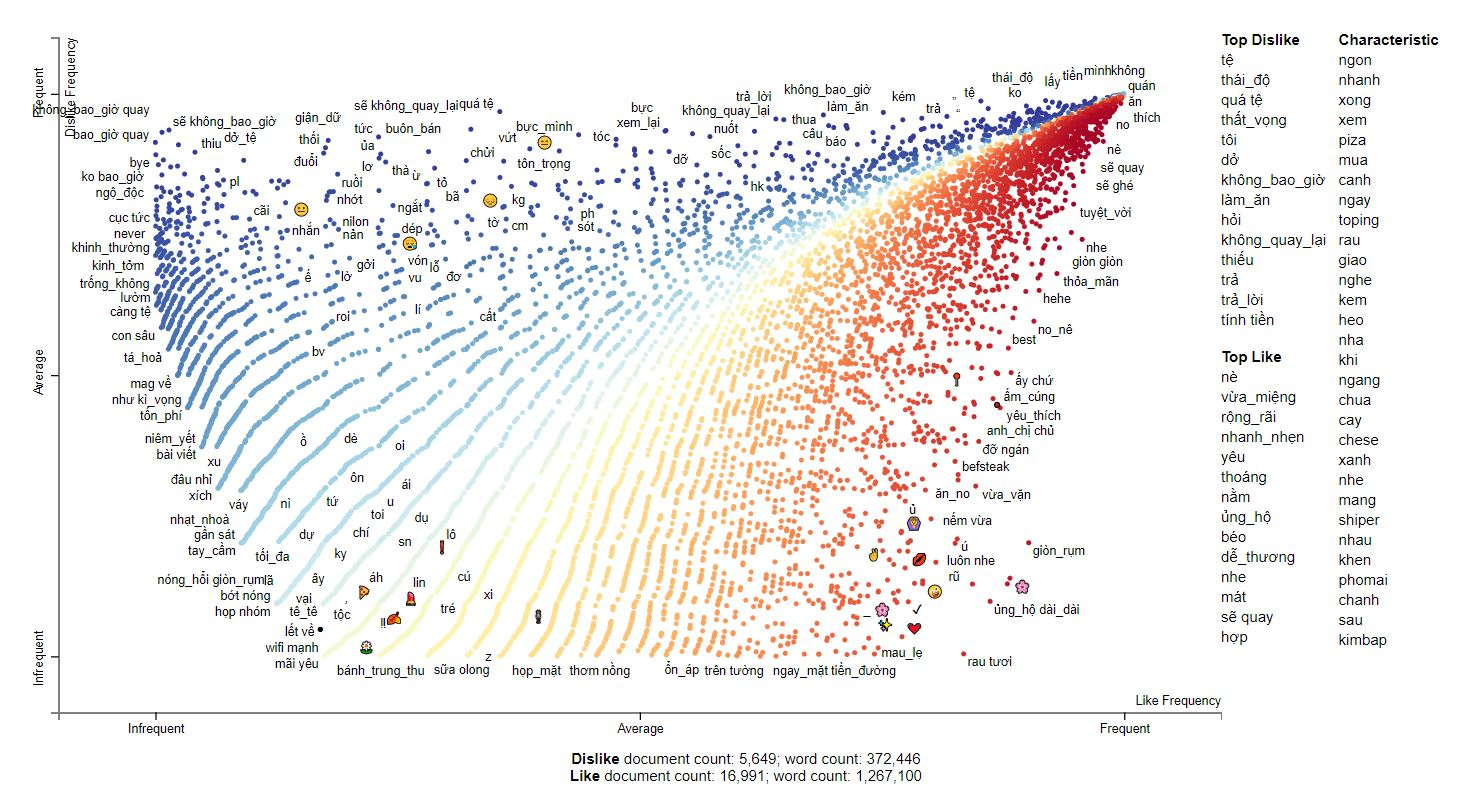